In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
print(train.head(), train.shape)            # (26457, 20)
print(test.head(), test.shape)              # (10000, 19)
print(submission.head(), submission.shape)  # (10000, 4)

   index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899         

In [3]:
print(train.info())
print(test.info())
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [4]:
train.corr()

<ipython-input-4-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,1.000000,0.001012,0.009848,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.002867,0.002181,-0.007841
child_num,0.001012,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.009848,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,-0.008901,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,0.004259,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.005575,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.001790,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.005332,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,-0.002867,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227


In [5]:
# 시각화를 통한 EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
pd.options.display.max_columns = None
import matplotlib
from matplotlib import font_manager, rc
import platform

#한글을 사용하기 위한 코드
try :
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
    # Mac 인 경우
        rc('font', family='AppleGothic')
except :
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
print(train.groupby('gender').count()['index'])  # 성별 분포 확인

gender
F    17697
M     8760
Name: index, dtype: int64


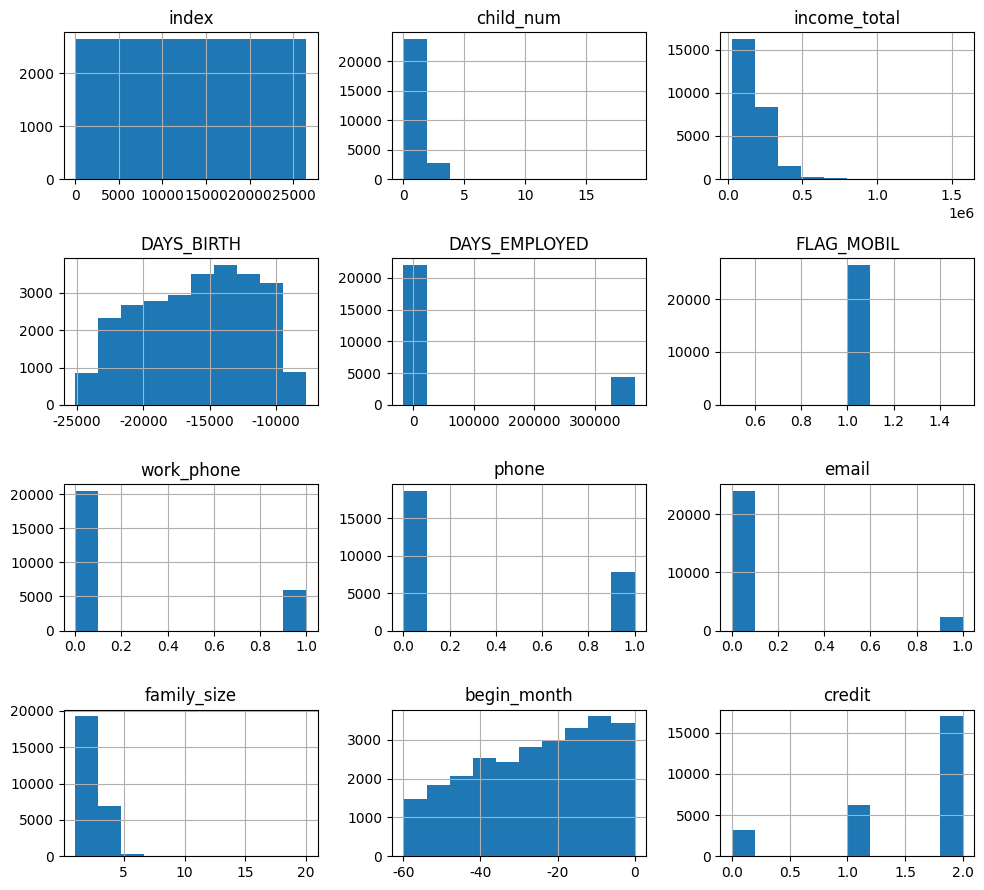

In [7]:
train.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

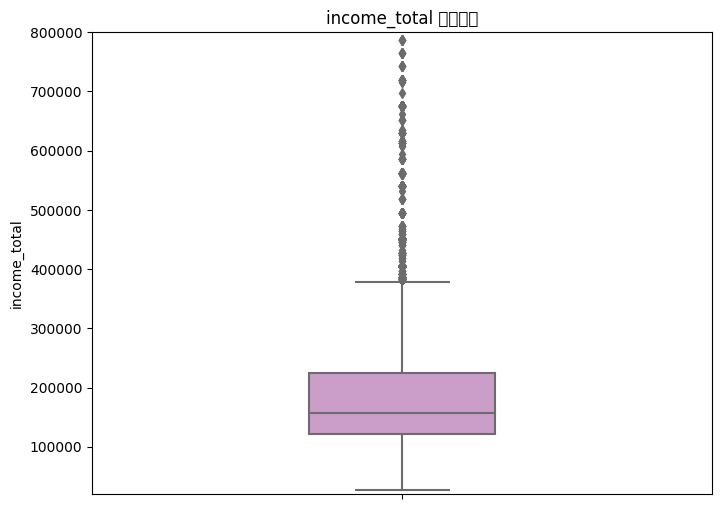

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train, y='income_total', width=0.3, color='#d395d0')
plt.title('income_total 연간소득')
plt.ylim(20000,800000)
plt.show()

In [9]:
# 결측치 처리
print(train.isnull().sum())  # occyp_type       8171
print(test.isnull().sum())   # occyp_type       3152
print(submission.isnull().sum())

# 결측치 %로 보기
for col in train.columns:
  msg=f'{col:>10}\t{100*train[col].isnull().mean():.2f}%'
  print(msg)

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64
index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64
index    0
0        0
1        0
2        0
dtype: int64
     index	0.00%
    gender	0.00%
       car	0.00%
   reali

In [10]:
# 결측치가 있던 occyp_type에 대해..
train['occyp_type'].value_counts(dropna=False)  # dropna=False를 통해 NaN값까지 확인가능
# occyp_type은 결측치가 8171로 가장 많고 그 다음은 Laborers가 4512, Core staff가 2646 순으로 데이터가 구성되어 있음을 알 수 있다.

# occyp_type은 직업 유형을 의미하는 변수.
# occyp_type의 숫자가 0보다 크면 실직인 상황이기 때문에 unemployed로 바꾸기
train.loc[train['DAYS_EMPLOYED']>0,'occyp_type']='unemployed'
test.loc[test['DAYS_EMPLOYED']>0,'occyp_type']='unemployed'

# income_type은 student이지만 occyp_type이 결측치인 경우, None값으로 대체
train.loc[(train['income_type'] == 'Student'), 'occyp_type'] = 'None'
test.loc[(train['income_type'] == 'Student'), 'occyp_type'] = 'None'

train = train.fillna('NaN')
test = test.fillna('NaN')

print(train.isnull().sum())
print(test.isnull().sum())

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64
index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
dtype: int64


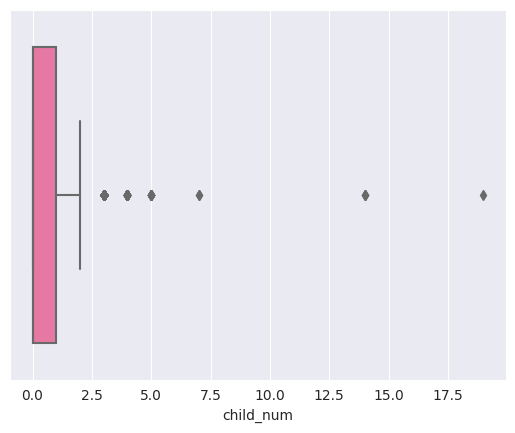

In [11]:
# 이상치 처리
import seaborn as sns
sns.set_style('darkgrid')

sns.boxplot(x=train['child_num'],palette="RdPu")
plt.show()
# 자녀수인 child_num가 2.5명 이상부터 이상치가 보였음.

train=train[(train['child_num']<=7)].reset_index(drop=True)

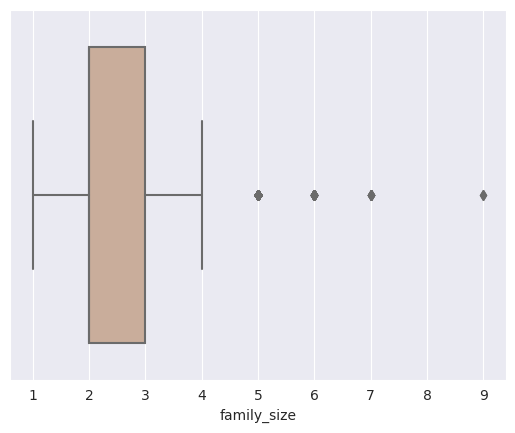

In [12]:
import seaborn as sns
sns.set_style('darkgrid')

sns.boxplot(x=train['family_size'],palette="pink")
plt.show()

In [13]:
train['family_size'].value_counts()
train = train[(train['family_size'] <= 7)].reset_index(drop=True)
print(train['family_size'].sort_values(ascending=False))


22589    7.0
20114    7.0
2671     7.0
17557    7.0
12873    7.0
        ... 
7403     1.0
19801    1.0
7408     1.0
19796    1.0
6940     1.0
Name: family_size, Length: 26451, dtype: float64


In [14]:
# Feature Engineering
# FLAG_MOBIL는 모두 1로만 값이 구성되어 있어 제거
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

# 고용되지 않은 사람 0으로 처리
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

# 음수값을 양수로 변환
train['DAYS_BIRTH'] = train['DAYS_BIRTH'] * -1
test['DAYS_BIRTH'] = test['DAYS_BIRTH'] * -1

train['begin_month'] = train['begin_month'] * -1
test['begin_month'] = test['begin_month'] * -1

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'] * -1
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'] * -1

In [15]:
# Feature 추가
import numpy as np
train['Age'] = train['DAYS_BIRTH']//365
test['Age'] = test['DAYS_BIRTH']//365
print(train.Age)

0        38
1        31
2        52
3        41
4        41
         ..
26446    33
26447    41
26448    27
26449    27
26450    53
Name: Age, Length: 26451, dtype: int64


In [16]:
# Scaling, Encoding
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("연속형 변수 개수: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("범주형 변수 개수: ", len(categorical_feats))

train['income_total'] = np.log1p(train['income_total'])

test['income_total'] = np.log1p(test['income_total'])

연속형 변수 개수:  10
범주형 변수 개수:  8


In [17]:
# 범주형 변수들에 대해 인코딩
from sklearn.preprocessing import LabelEncoder
for ord in categorical_feats:
    le = LabelEncoder()
    le.fit(train[ord].astype(str))
    train[ord] = le.transform(train[ord].astype(str))

    prev_class = list(le.classes_)

    for label in np.unique(test[ord].astype(str)):
        if label not in prev_class:
            prev_class.append(label)

    le.classes_ = np.array(prev_class)
    test[ord] = le.transform(test[ord].astype(str))

In [18]:
# 스케일링
from sklearn.preprocessing import StandardScaler
numerical_feats.remove('income_total')
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])
test[numerical_feats] = scaler.transform(test[numerical_feats])

In [19]:
# from sklearn.cluster import KMeans

# kmeans_train = train.drop(['credit'], axis=1)
# kmeans = KMeans(n_clusters=24, random_state=42).fit(kmeans_train)
# train['cluster'] = kmeans.predict(kmeans_train)
# test['cluster'] = kmeans.predict(test)

In [20]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = train.corr(), annot=True,
# fmt = '.2f', linewidths=5, cmap='Reds')

In [21]:
# Modeling
seed=42
print(f'train:{train.columns} \n test:{test.columns}')

train:Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit', 'Age'],
      dtype='object') 
 test:Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'Age'],
      dtype='object')


In [22]:
target = train.credit
train = train.drop('credit',axis = 1)

In [23]:
from sklearn.model_selection import train_test_split


# x,y 로 분리한 train 데이터를 train, val 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(train,target,test_size=0.2, random_state=seed)

In [24]:
#평가지표
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=seed)
lr_model.fit(X_train,y_train)

val_pred = lr_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = lr_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.639009639009639
log_loss :  0.8555639398166225


In [25]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

dt_model = DecisionTreeClassifier(random_state=seed)
dt_model.fit(X_train,y_train)

val_pred = dt_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = dt_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

# ExtraTreeClassifier
et_model = ExtraTreeClassifier(random_state=seed)
et_model.fit(X_train,y_train)

val_pred = et_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = et_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6250236250236251
log_loss :  12.995325223040505
accuracy_score :  0.6099036099036099
log_loss :  13.546025502950293


In [26]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=seed)
rf_model.fit(X_train,y_train)

val_pred = dt_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = dt_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6250236250236251
log_loss :  12.995325223040505


In [27]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

gbm_model = GradientBoostingClassifier(random_state=seed)
gbm_model.fit(X_train,y_train)

val_pred = gbm_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = gbm_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6955206955206955
log_loss :  0.7810987533857962


In [28]:
abm_model = AdaBoostClassifier(random_state=seed)
abm_model.fit(X_train,y_train)

val_pred = abm_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = abm_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.6928746928746928
log_loss :  1.0806933436474042


In [29]:
from xgboost.sklearn import XGBClassifier

xgb_model = XGBClassifier(random_state=seed)
xgb_model.fit(X_train,y_train)

val_pred = xgb_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = xgb_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

accuracy_score :  0.7087507087507088
log_loss :  0.7336525736145303


In [30]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=seed)
lgbm_model.fit(X_train,y_train)

val_pred = lgbm_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = lgbm_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 21160, number of used features: 18
[LightGBM] [Info] Start training from score -2.086270
[LightGBM] [Info] Start training from score -1.452523
[LightGBM] [Info] Start training from score -0.443367
accuracy_score :  0.7057267057267057
log_loss :  0.7382606641161102


In [31]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [32]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=seed)
cat_model.fit(X_train,y_train)

val_pred = cat_model.predict(X_valid)
print('accuracy_score : ' ,accuracy_score(y_valid,val_pred))

val_pred2 = cat_model.predict_proba(X_valid)
print('log_loss : ' ,log_loss(y_valid,val_pred2))

Learning rate set to 0.092454
0:	learn: 1.0470791	total: 58.8ms	remaining: 58.7s
1:	learn: 1.0063523	total: 68.2ms	remaining: 34s
2:	learn: 0.9730546	total: 77.5ms	remaining: 25.8s
3:	learn: 0.9464203	total: 86.4ms	remaining: 21.5s
4:	learn: 0.9247363	total: 97.7ms	remaining: 19.4s
5:	learn: 0.9067313	total: 117ms	remaining: 19.3s
6:	learn: 0.8912041	total: 129ms	remaining: 18.3s
7:	learn: 0.8781288	total: 138ms	remaining: 17.2s
8:	learn: 0.8672916	total: 148ms	remaining: 16.3s
9:	learn: 0.8580934	total: 157ms	remaining: 15.5s
10:	learn: 0.8512392	total: 168ms	remaining: 15.1s
11:	learn: 0.8445925	total: 177ms	remaining: 14.6s
12:	learn: 0.8392592	total: 187ms	remaining: 14.2s
13:	learn: 0.8343776	total: 197ms	remaining: 13.8s
14:	learn: 0.8299768	total: 209ms	remaining: 13.8s
15:	learn: 0.8262082	total: 220ms	remaining: 13.5s
16:	learn: 0.8231675	total: 229ms	remaining: 13.2s
17:	learn: 0.8206284	total: 238ms	remaining: 13s
18:	learn: 0.8183348	total: 246ms	remaining: 12.7s
19:	learn:

In [33]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.2 MB/s eta 0:00:00


In [34]:
# Tuning
from sklearn.model_selection import StratifiedKFold  # KFold 교차검증에 사용, 데이터를 일정 비율로 나누어 모델 검증 및 평가 시 활용
from optuna.samplers import TPESampler  # 베이지안 최적화를 위한 샘플러 중 하나. 새로운 하이퍼 파라미터 값을 탐색하기 위해 확률적으로 효과적인 접근 방식 제공
from optuna import Trial
import optuna

In [35]:
def objective(trial: Trial) -> float:

    params_catboost = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 10),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 1.0),
        'eval_metric': 'MultiClass',
        'verbose': False,
    }

    X_train, X_valid, y_train, y_valid = train_test_split(train,target,test_size=0.2, random_state=seed)

    model = CatBoostClassifier(**params_catboost)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=False)

    pred = model.predict_proba(X_valid)
    log_score = log_loss(y_valid, pred)

    return log_score

In [36]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'catboost_parameter_opt',
    direction='minimize',
    sampler = sampler,)

study.optimize(objective, n_trials=300) #epoch

print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2024-01-03 07:48:59,248] A new study created in memory with name: catboost_parameter_opt
[I 2024-01-03 07:49:05,972] Trial 0 finished with value: 0.7504562175757461 and parameters: {'iterations': 218, 'depth': 9, 'learning_rate': 0.29106359131330695, 'min_child_samples': 6, 'border_count': 40, 'l2_leaf_reg': 1.7699302940633311e-07}. Best is trial 0 with value: 0.7504562175757461.
[I 2024-01-03 07:49:08,962] Trial 1 finished with value: 0.8059464349669321 and parameters: {'iterations': 76, 'depth': 8, 'learning_rate': 0.15930522616241014, 'min_child_samples': 8, 'border_count': 6, 'l2_leaf_reg': 0.574485163632042}. Best is trial 0 with value: 0.7504562175757461.
[I 2024-01-03 07:49:16,543] Trial 2 finished with value: 0.7969838583317703 and parameters: {'iterations': 425, 'depth': 2, 'learning_rate': 0.02310201887845294, 'min_child_samples': 2, 'border_count': 78, 'l2_leaf_reg': 0.00015777981883364995}. Best is trial 0 with value: 0.7504562175757461.
[I 2024-01-03 07:49:20,123] Trial

Best Score: 0.7246281211864569
Best trial: {'iterations': 500, 'depth': 9, 'learning_rate': 0.03570527655942187, 'min_child_samples': 2, 'border_count': 177, 'l2_leaf_reg': 0.0008229299213513318}
